In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [3]:
df = pd.read_csv('Microsoft_malware_dataset_min.csv')

In [4]:
df.head()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_OSEdition,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,OsPlatformSubRelease,CountryIdentifier
0,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,29
1,0,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,93
2,0,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,86
3,1,0.0,0.0,Professional,0,1.0,0.0,1.0,rs4,88
4,1,0.0,0.0,Core,0,1.0,0.0,1.0,rs4,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   HasDetections               100000 non-null  int64  
 1   Wdft_IsGamer                96585 non-null   float64
 2   Census_IsVirtualDevice      99815 non-null   float64
 3   Census_OSEdition            100000 non-null  object 
 4   Census_HasOpticalDiskDrive  100000 non-null  int64  
 5   Firewall                    98924 non-null   float64
 6   SMode                       94068 non-null   float64
 7   IsProtected                 99609 non-null   float64
 8   OsPlatformSubRelease        100000 non-null  object 
 9   CountryIdentifier           100000 non-null  int64  
dtypes: float64(5), int64(3), object(2)
memory usage: 7.6+ MB


In [6]:
df.describe()

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier
count,100000.000000,96585.000000,99815.000000,100000.000000,98924.000000,94068.000000,99609.000000,100000.000000
mean,0.499280,0.281607,0.006642,0.075850,0.977326,0.000351,0.944864,108.188050
std,0.500002,0.449785,0.081230,0.264759,0.148863,0.018727,0.228246,62.989406
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,51.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,97.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,162.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,222.000000


In [7]:
df.describe(include = 'object').T

,count,unique,top,freq
Census_OSEdition,100000,19,Core,38727
OsPlatformSubRelease,100000,9,rs4,43955


In [8]:
df.isnull().sum()

HasDetections                    0
Wdft_IsGamer                  3415
Census_IsVirtualDevice         185
Census_OSEdition                 0
Census_HasOpticalDiskDrive       0
Firewall                      1076
SMode                         5932
IsProtected                    391
OsPlatformSubRelease             0
CountryIdentifier                0
dtype: int64

In [9]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

imputer_num = SimpleImputer(strategy='mean')
df[numerical_cols] = imputer_num.fit_transform(df[numerical_cols])

imputer_cat = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_cat.fit_transform(df[categorical_cols])


print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
HasDetections                 0
Wdft_IsGamer                  0
Census_IsVirtualDevice        0
Census_OSEdition              0
Census_HasOpticalDiskDrive    0
Firewall                      0
SMode                         0
IsProtected                   0
OsPlatformSubRelease          0
CountryIdentifier             0
dtype: int64


In [10]:
duplicate_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_count}")

if duplicate_count > 0:
    df = df.drop_duplicates()
    print(f"Duplicates removed. New dataset shape: {df.shape}")
else:
    print("No duplicates found.")


Number of duplicate rows: 79581
Duplicates removed. New dataset shape: (20419, 10)


In [24]:
profile = ProfileReport(df, title="Microsoft Malware Dataset Profiling Report", explorative=True)

profile.to_widgets()

profile.to_file("microsoft_malware_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
profile.to_notebook_iframe()

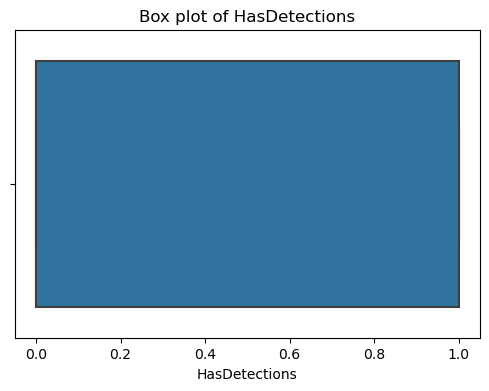

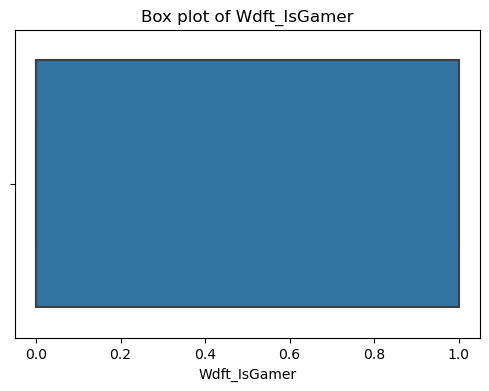

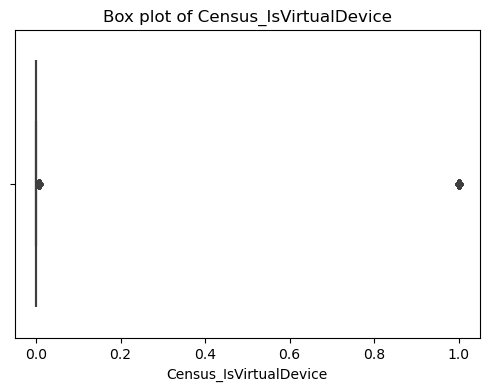

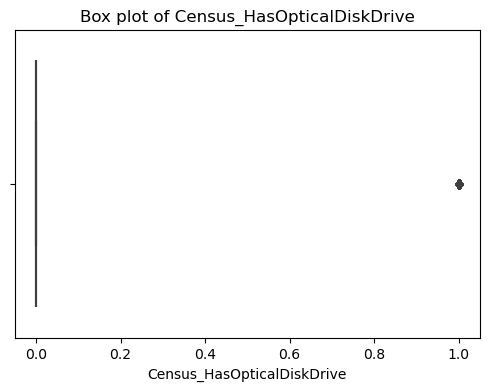

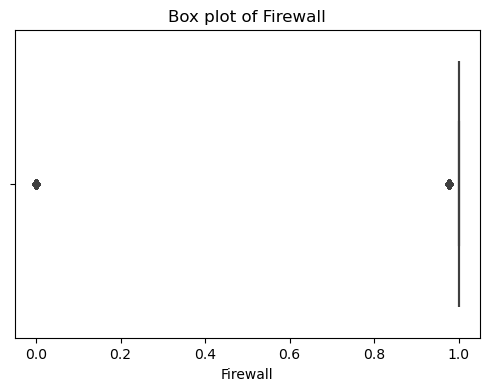

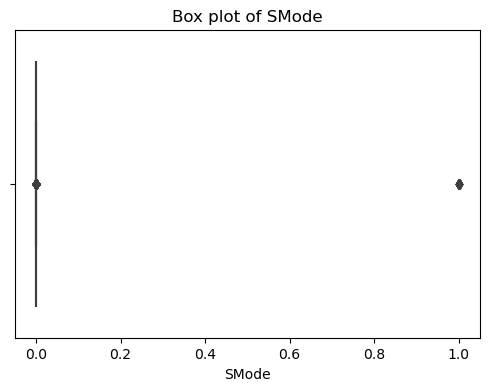

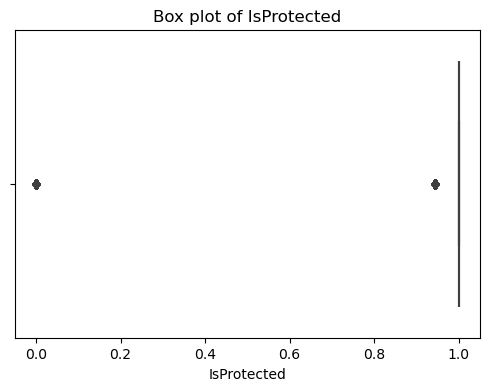

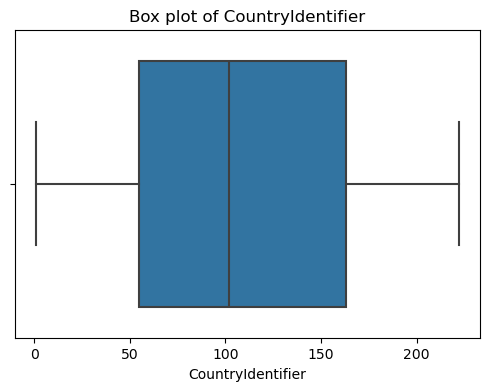

Removed outliers from HasDetections. Shape changed from (20419, 10) to (20419, 10)
Removed outliers from Wdft_IsGamer. Shape changed from (20419, 10) to (20419, 10)
Removed outliers from Census_IsVirtualDevice. Shape changed from (20419, 10) to (19751, 10)
Removed outliers from Census_HasOpticalDiskDrive. Shape changed from (19751, 10) to (16053, 10)
Removed outliers from Firewall. Shape changed from (16053, 10) to (14333, 10)
Removed outliers from SMode. Shape changed from (14333, 10) to (11197, 10)
Removed outliers from IsProtected. Shape changed from (11197, 10) to (8918, 10)
Removed outliers from CountryIdentifier. Shape changed from (8918, 10) to (8918, 10)


In [11]:
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Box plot of {col}')
    plt.show()

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in numerical_cols:
    initial_shape = df.shape
    df = remove_outliers(df, col)
    final_shape = df.shape
    print(f"Removed outliers from {col}. Shape changed from {initial_shape} to {final_shape}")

In [12]:
print("\nCategorical Columns:")
print(categorical_cols)

le = LabelEncoder()
for col in categorical_cols:
    if df[col].nunique() == 2:
        df[col] = le.fit_transform(df[col])
    else:
        df = pd.get_dummies(df, columns=[col], drop_first=True)

print("\nDataset after encoding categorical variables:")
print(df.head())


Categorical Columns:
Index(['Census_OSEdition', 'OsPlatformSubRelease'], dtype='object')

Dataset after encoding categorical variables:
   HasDetections  Wdft_IsGamer  Census_IsVirtualDevice  \
0            0.0           0.0                     0.0   
1            0.0           0.0                     0.0   
2            0.0           0.0                     0.0   
3            1.0           0.0                     0.0   
4            1.0           0.0                     0.0   

   Census_HasOpticalDiskDrive  Firewall  SMode  IsProtected  \
0                         0.0       1.0    0.0          1.0   
1                         0.0       1.0    0.0          1.0   
2                         0.0       1.0    0.0          1.0   
3                         0.0       1.0    0.0          1.0   
4                         0.0       1.0    0.0          1.0   

   CountryIdentifier  Census_OSEdition_Core  \
0               29.0                  False   
1               93.0                  Fal

In [13]:
df

,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Census_OSEdition_Core,Census_OSEdition_CoreCountrySpecific,...,Census_OSEdition_ProfessionalEducationN,Census_OSEdition_ProfessionalN,OsPlatformSubRelease_rs1,OsPlatformSubRelease_rs2,OsPlatformSubRelease_rs3,OsPlatformSubRelease_rs4,OsPlatformSubRelease_th1,OsPlatformSubRelease_th2,OsPlatformSubRelease_windows7,OsPlatformSubRelease_windows8.1
0,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,29.0,False,False,...,False,False,False,False,False,True,False,False,False,False
1,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,93.0,False,False,...,False,False,False,False,False,True,False,False,False,False
2,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,86.0,True,False,...,False,False,False,False,False,True,False,False,False,False
3,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,88.0,False,False,...,False,False,False,False,False,True,False,False,False,False
4,1.0,0.000000,0.0,0.0,1.0,0.0,1.0,18.0,True,False,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99880,0.0,0.281607,0.0,0.0,1.0,0.0,1.0,137.0,True,False,...,False,False,False,False,False,True,False,False,False,False
99898,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,22.0,False,False,...,False,False,False,False,True,False,False,False,False,False
99899,0.0,0.000000,0.0,0.0,1.0,0.0,1.0,121.0,False,False,...,False,False,False,False,False,False,False,True,False,False
99947,1.0,0.281607,0.0,0.0,1.0,0.0,1.0,107.0,False,False,...,False,False,False,False,False,False,False,True,False,False


In [14]:
Target = 'HasDetections'
X = df.drop(Target, axis=1)
y = df[Target]

In [15]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

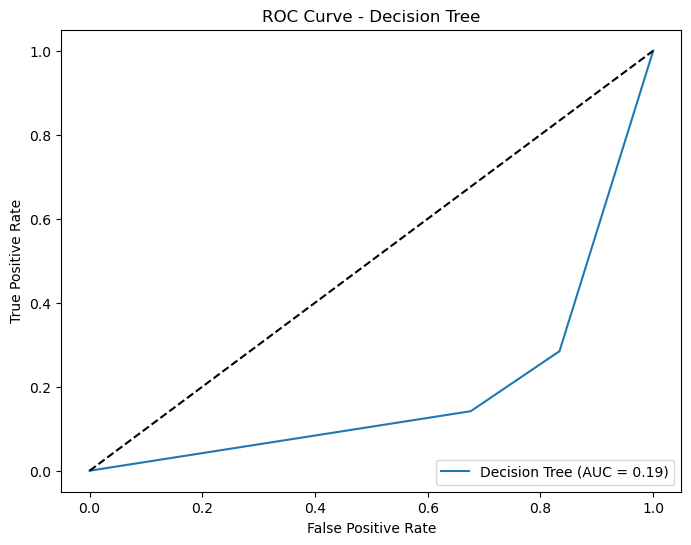


Classification Report:
              precision    recall  f1-score   support

         0.0       0.28      0.32      0.30       902
         1.0       0.17      0.14      0.15       882

    accuracy                           0.23      1784
   macro avg       0.22      0.23      0.23      1784
weighted avg       0.22      0.23      0.23      1784



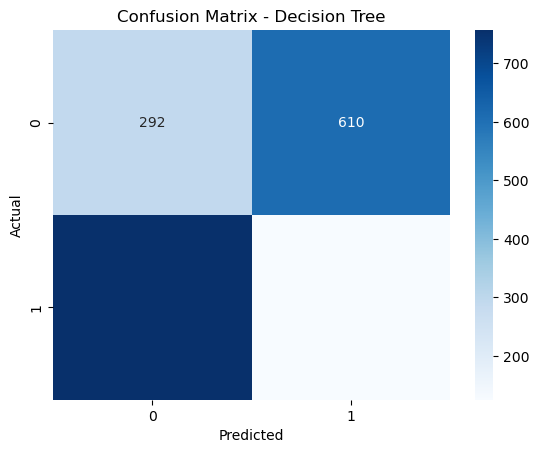

In [16]:
dt_classifier = DecisionTreeClassifier(random_state=42)

dt_classifier.fit(X_train, y_train)

y_probs = dt_classifier.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree')
plt.legend(loc='lower right')
plt.show()

y_pred = dt_classifier.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 6, 'min_samples_split': 15}
Best AUC Score: 0.46


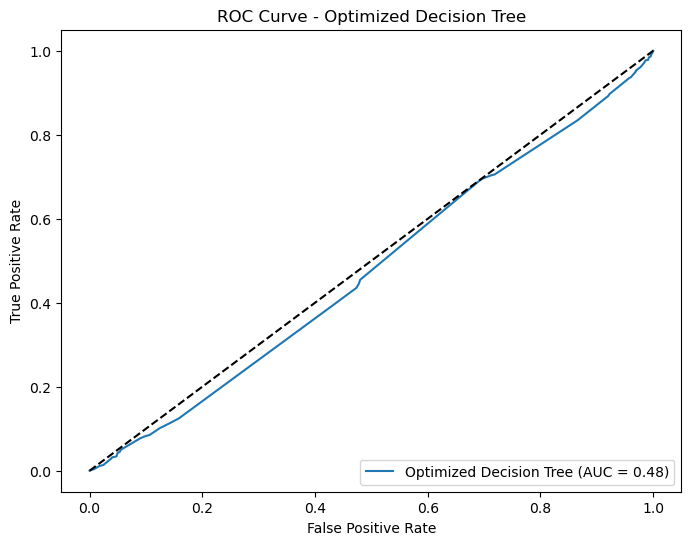


Optimized Classification Report:
              precision    recall  f1-score   support

         0.0       0.49      0.57      0.52       902
         1.0       0.47      0.40      0.43       882

    accuracy                           0.48      1784
   macro avg       0.48      0.48      0.48      1784
weighted avg       0.48      0.48      0.48      1784



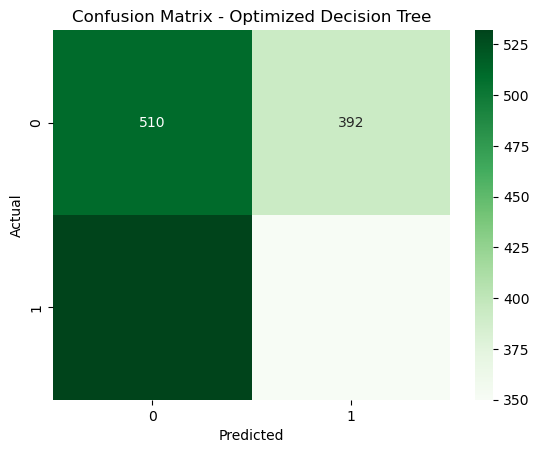

In [17]:
param_grid = {
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6]
}


grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    n_jobs=-1,
    scoring='roc_auc'
)

grid_search.fit(X_train, y_train)


print(f"\nBest Parameters: {grid_search.best_params_}")
print(f"Best AUC Score: {grid_search.best_score_:.2f}")

best_dt = grid_search.best_estimator_
best_dt.fit(X_train, y_train)

y_probs_best = best_dt.predict_proba(X_test)[:, 1]


fpr_best, tpr_best, thresholds_best = roc_curve(y_test, y_probs_best)
roc_auc_best = auc(fpr_best, tpr_best)


plt.figure(figsize=(8, 6))
plt.plot(fpr_best, tpr_best, label=f'Optimized Decision Tree (AUC = {roc_auc_best:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Optimized Decision Tree')
plt.legend(loc='lower right')
plt.show()

y_pred_best = best_dt.predict(X_test)
print("\nOptimized Classification Report:")
print(classification_report(y_test, y_pred_best))

cm_best = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm_best, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Optimized Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [20]:
X_unsupervised = df.drop(Target, axis=1)
scaler_unsupervised = StandardScaler()
X_unsupervised_scaled = scaler_unsupervised.fit_transform(X_unsupervised)

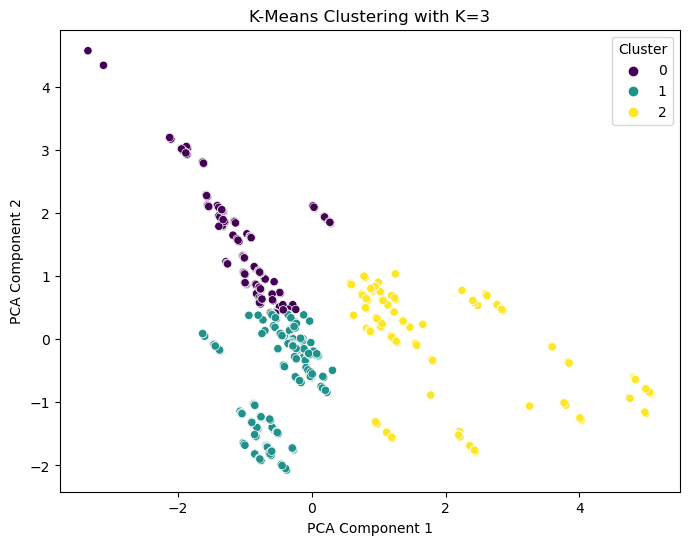

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unsupervised_scaled)

k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_pca)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels, palette='viridis')
plt.title(f'K-Means Clustering with K={k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

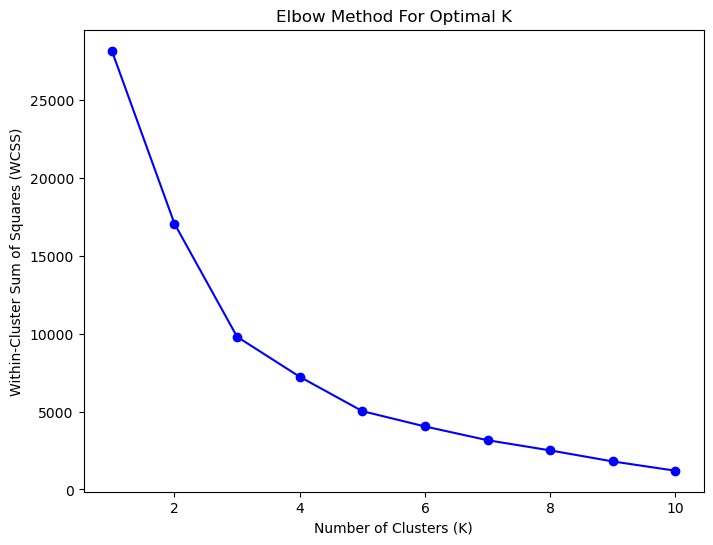

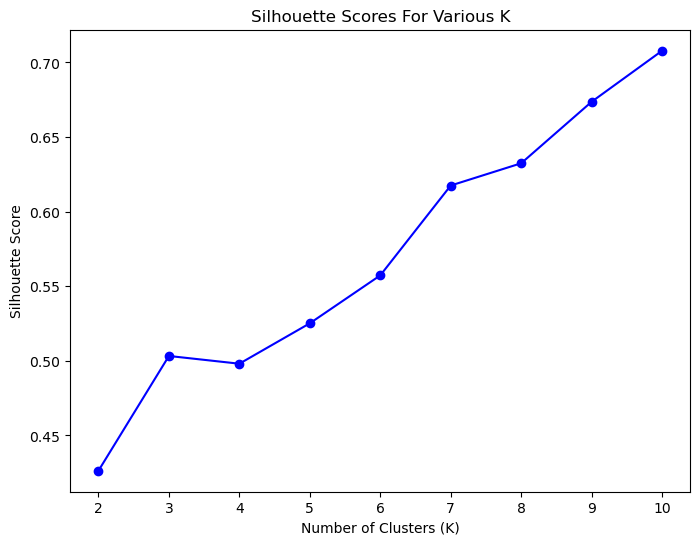


Optimal number of clusters: 3


In [22]:
wcss = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(K_range, wcss, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method For Optimal K')
plt.show()

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_pca)
    score = silhouette_score(X_pca, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores For Various K')
plt.show()

optimal_k = 3
print(f"\nOptimal number of clusters: {optimal_k}")


Cluster Distribution:
Cluster
1    4199
2    2754
0    1965
Name: count, dtype: int64


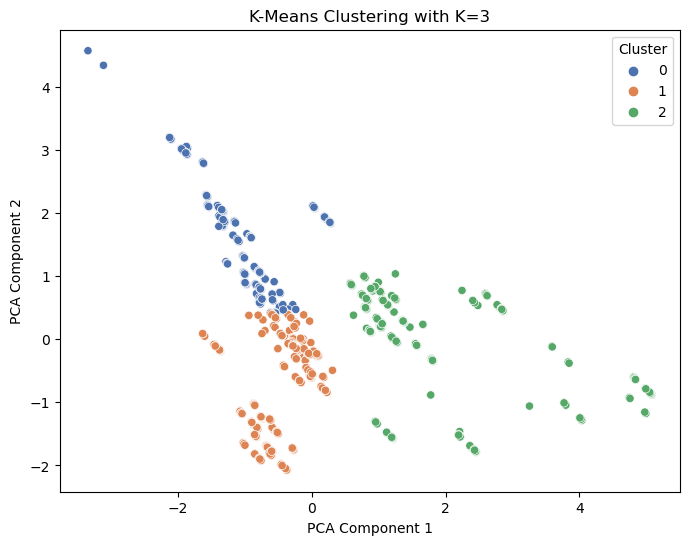


Cluster 0 Statistics:


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Cluster
count,1965.000000,1965.000000,1965.0,1965.0,1965.0,1965.0,1965.0,1965.000000,1965.0
mean,0.516031,0.442113,0.0,0.0,1.0,0.0,1.0,110.281425,0.0
std,0.499870,0.468045,0.0,0.0,0.0,0.0,0.0,62.613463,0.0
min,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,1.000000,0.0
25%,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,56.000000,0.0
50%,1.000000,0.281607,0.0,0.0,1.0,0.0,1.0,107.000000,0.0
75%,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,163.000000,0.0
max,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,222.000000,0.0



Cluster 1 Statistics:


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Cluster
count,4199.000000,4199.000000,4199.0,4199.0,4199.0,4199.0,4199.0,4199.000000,4199.0
mean,0.481305,0.379180,0.0,0.0,1.0,0.0,1.0,110.821862,1.0
std,0.499710,0.464488,0.0,0.0,0.0,0.0,0.0,62.948058,0.0
min,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,1.000000,1.0
25%,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,56.000000,1.0
50%,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,107.000000,1.0
75%,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,163.000000,1.0
max,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,222.000000,1.0



Cluster 2 Statistics:


,HasDetections,Wdft_IsGamer,Census_IsVirtualDevice,Census_HasOpticalDiskDrive,Firewall,SMode,IsProtected,CountryIdentifier,Cluster
count,2754.000000,2754.000000,2754.0,2754.0,2754.0,2754.0,2754.0,2754.000000,2754.0
mean,0.497821,0.342096,0.0,0.0,1.0,0.0,1.0,110.080247,2.0
std,0.500086,0.452215,0.0,0.0,0.0,0.0,0.0,63.735939,0.0
min,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,2.000000,2.0
25%,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,56.000000,2.0
50%,0.000000,0.000000,0.0,0.0,1.0,0.0,1.0,102.000000,2.0
75%,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,166.000000,2.0
max,1.000000,1.000000,0.0,0.0,1.0,0.0,1.0,222.000000,2.0


In [23]:
kmeans_optimal = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_optimal.fit(X_pca)
labels_optimal = kmeans_optimal.labels_

df['Cluster'] = labels_optimal

print("\nCluster Distribution:")
print(df['Cluster'].value_counts())

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=labels_optimal, palette='deep')
plt.title(f'K-Means Clustering with K={optimal_k}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

for cluster in range(optimal_k):
    print(f"\nCluster {cluster} Statistics:")
    display(df[df['Cluster'] == cluster].describe())